In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#let us load the data set
df=pd.read_csv('EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [22]:
#Checking if there is any missing data
df.apply(lambda x: sum(x.isnull()), axis=0) # No missing data
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
#From the Dataset, get all the Manchester United players and their Stats
MNU=df.loc[df['Club']=="Manchester United"]
MNU.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,74.6,9,10,0.45,0.32,6,0
52,Aaron Wan-Bissaka,Manchester United,ENG,DF,22,34,34,3060,2,4,2065,86.0,0,0,0.03,0.07,3,0
53,Harry Maguire,Manchester United,ENG,DF,27,34,34,3047,2,1,2139,89.0,0,0,0.06,0.01,11,0
54,Marcus Rashford,Manchester United,ENG,FW,22,37,33,2920,11,9,1234,80.6,0,0,0.29,0.11,4,0
55,Luke Shaw,Manchester United,ENG,DF,25,32,30,2654,1,5,2015,81.6,0,0,0.02,0.18,8,0


In [25]:
# Create Two Columns
df["MinsPerMatch"]=(df["Mins"]/df["Matches"]).astype(int)
df["GoalsPerMatch"]=(df["Goals"]/df["Matches"]).astype(float)
df.head(5)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [27]:
#Total Goals
TotalGoals=df["Goals"].sum()
TotalGoals

986

In [29]:
#Penalty Goals
Penalty_Goals=df["Penalty_Goals"].sum()
Penalty_Goals

102

In [31]:
#Penalties Attempted
Penalties_Attempted=df["Penalty_Attempted"].sum()
Penalties_Attempted

125

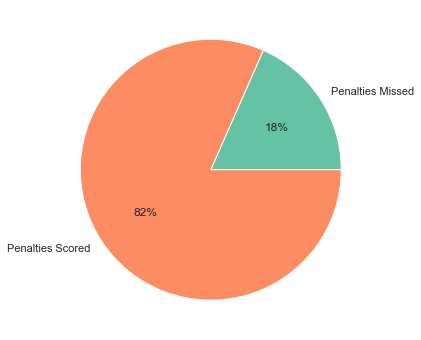

In [34]:
#Pie Chart for Penalties Missed vs scored
plt.figure(figsize=(13,6))
pl_not_scored=Penalties_Attempted-Penalty_Goals
data=[pl_not_scored, Penalty_Goals]
labels=['Penalties Missed', 'Penalties Scored']
color=sns.color_palette('Set2')
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

In [35]:
#Unique Positions
df["Position"].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [38]:
#Total FW players
df[df["Position"]=="FW"]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [39]:
#Players from different nations
np.size((df["Nationality"].unique()))

59

<AxesSubplot:xlabel='Nationality'>

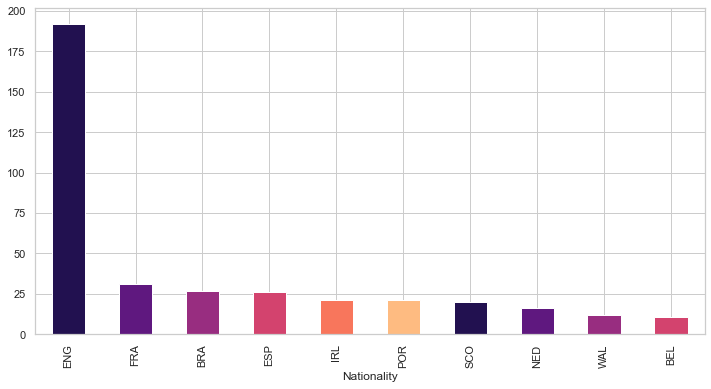

In [44]:
#Most Players from which Countries
nationality=df.groupby("Nationality").size().sort_values(ascending=False)
nationality.head(10).plot(kind="bar", figsize=(12,6), color=sns.color_palette('magma'))

<AxesSubplot:>

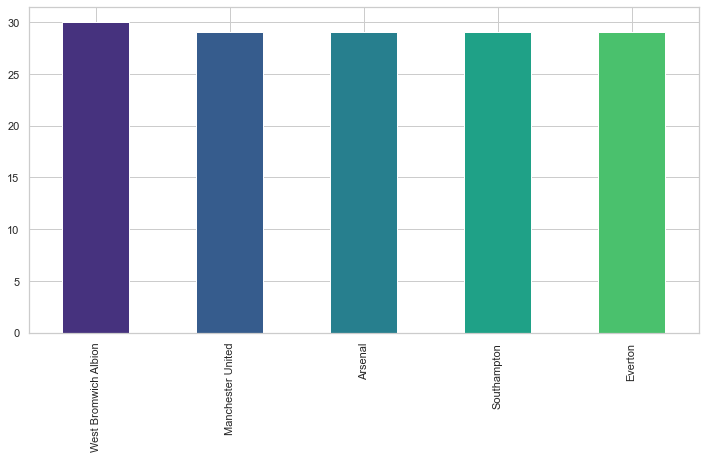

In [47]:
#Clubs with maximum players in their squad
df["Club"].value_counts().nlargest(5).plot(kind="bar", figsize=(12,6), color=sns.color_palette("viridis"))

<AxesSubplot:>

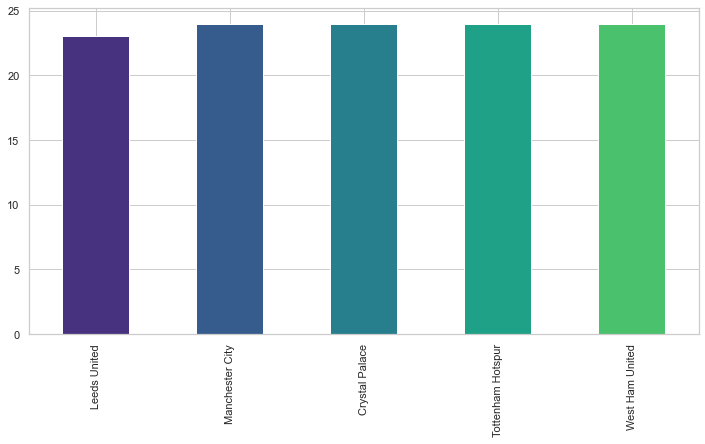

In [48]:
#Clubs with the least players in their squad
df["Club"].value_counts().nsmallest(5).plot(kind="bar", figsize=(12,6), color=sns.color_palette("viridis"))

In [50]:
#Players based on the age groups
Under20=df[df['Age']<=20]
age20_25=df[(df["Age"]>20) &(df['Age']<=25)]
age25_30=df[(df["Age"]>25) &(df['Age']<=30)]
Above30=df[df['Age']>30]

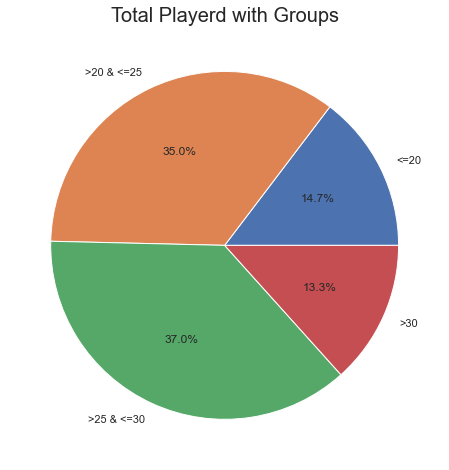

In [53]:
x=np.array([Under20["Name"].count(), age20_25['Name'].count(), age25_30["Name"].count(), Above30["Name"].count()])
mylabels=["<=20", ">20 & <=25", ">25 & <=30", ">30"]
plt.title('Total Playerd with Groups', fontsize=20)
plt.pie(x, labels=mylabels, autopct="%.1f%%")
plt.show()

<AxesSubplot:>

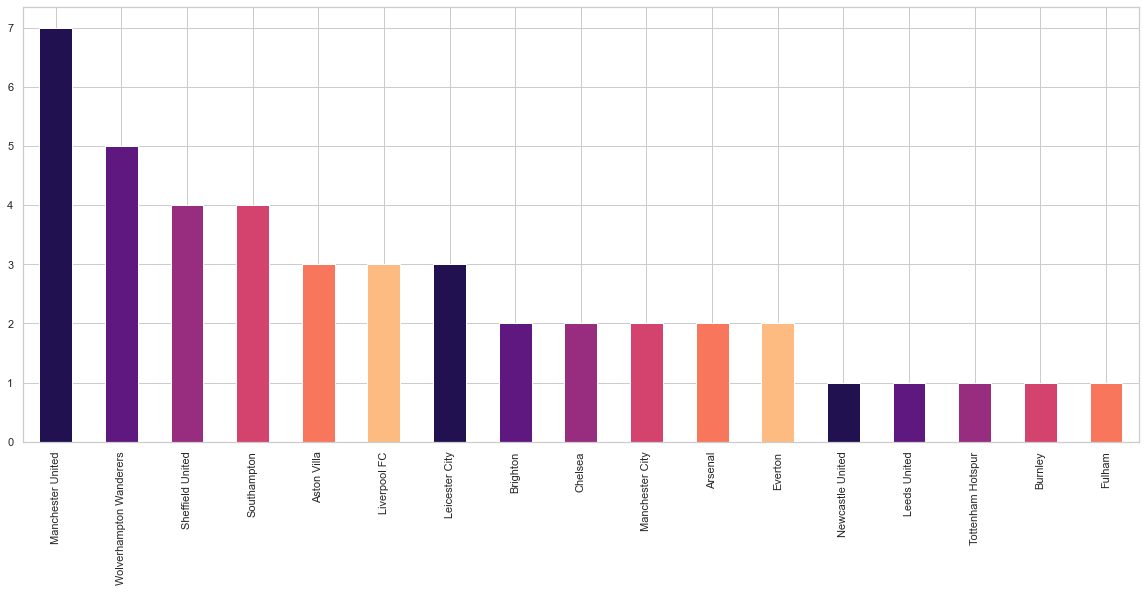

In [59]:
#Total Under20 Players
player_under_20=df[df["Age"] <20]
player_under_20['Club'].value_counts().plot(kind='bar', color=sns.color_palette("magma"))

In [6]:
#Total Goals scored by united in the 20_21 season
MNU.Goals.sum() #70

70

In [10]:
#List of the Top Scorers in MNU
Top_scorers=MNU[['Name', 'Goals']].sort_values(by="Goals", ascending=False)
Top_scorers=Top_scorers[Top_scorers["Goals"]>=1]
Top_scorers=Top_scorers.nlargest(n=10, columns="Goals")
Top_scorers

,Name,Goals
51,Bruno Fernandes,18
54,Marcus Rashford,11
63,Edinson Cavani,10
61,Mason Greenwood,7
59,Scott McTominay,4
62,Anthony Martial,4
60,Paul Pogba,3
66,Daniel James,3
53,Harry Maguire,2
52,Aaron Wan-Bissaka,2


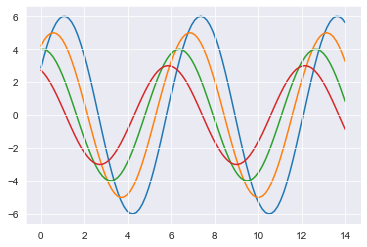

In [3]:
import numpy as np
from matplotlib import pyplot as plt
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 5):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip) 
sns.set_style("darkgrid",{'axes.axisbelow':False})
sns.despine()
sinplot()
plt.show()

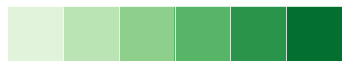

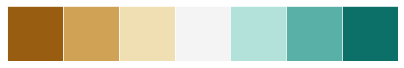

In [5]:
current_platte=sns.color_palette()
sns.palplot(sns.color_palette("Greens"))
plt.show
sns.palplot(sns.color_palette("BrBG",7))
plt.show()

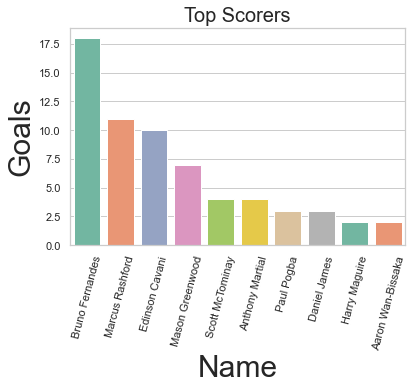

In [11]:
sns.set_theme(style="whitegrid", color_codes=True)
ax=sns.barplot(data=Top_scorers, x="Name", y="Goals", palette='Set2')
ax.set_xlabel("Name", fontsize=30)
ax.set_ylabel("Goals", fontsize=30)
plt.xticks(rotation=75)
#plt.rcParams["figure.figsize"]=(20,8)
plt.title("Top Scorers", fontsize=20)
plt.show()

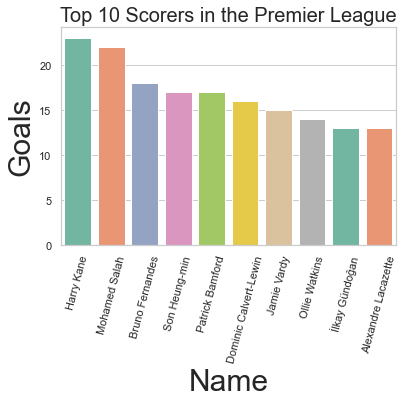

In [12]:
#Top Ten Scorers in the Premier League
Top=df[['Name', "Club", "Goals"]].nlargest(n=10, columns='Goals')
t=sns.barplot(data=Top, x="Name", y="Goals", palette=sns.color_palette('Set2'))
t.set_xlabel("Name", fontsize=30)
t.set_ylabel("Goals", fontsize=30)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]=(20,8)
plt.title("Top 10 Scorers in the Premier League", fontsize=20)
plt.show()

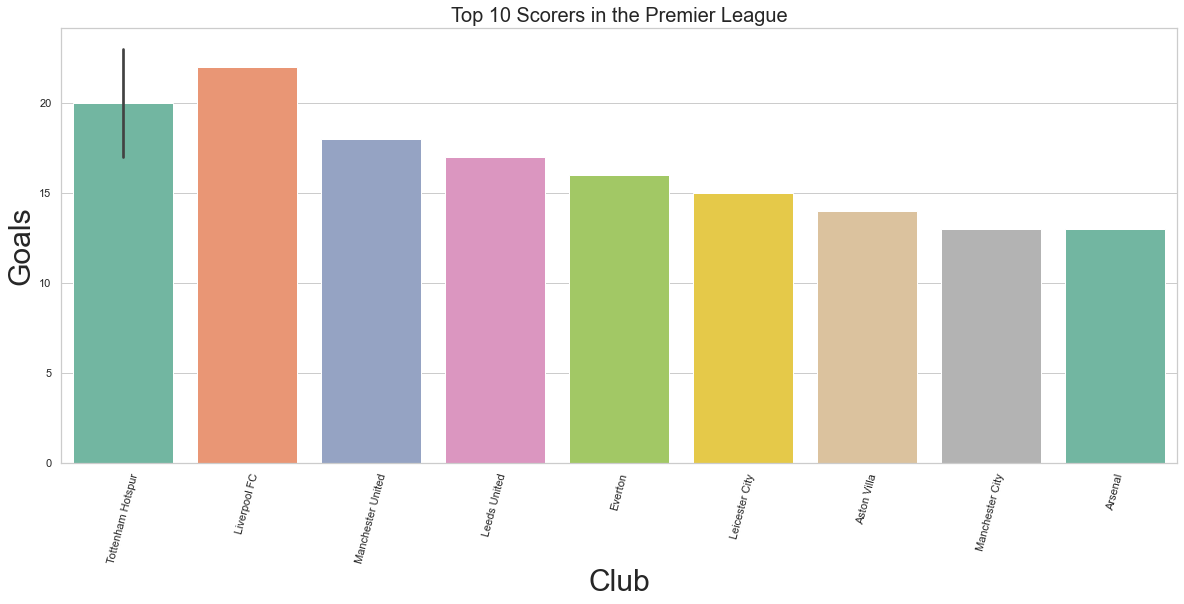

In [16]:
Top=df[["Club", "Goals"]].nlargest(n=10, columns='Goals')
t=sns.barplot(data=Top, x="Club", y="Goals", palette=sns.color_palette('Set2'))
t.set_xlabel("Club", fontsize=30)
t.set_ylabel("Goals", fontsize=30)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]=(20,8)
plt.title("Top 10 Scorers in the Premier League", fontsize=20)
plt.show()

In [20]:
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64